**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 네비게이션 주행데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 도착시각을 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [23]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas는 데이터 분석을 위해 널리 사용되는 파이썬 라이브러리입니다.
### Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [24]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* A0007IT.json 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.
* Encoding = "cp949"로 지정하세요.

In [25]:
# 여기에 답안코드를 작성하세요.
df = pd.read_json('A0007IT.json', encoding = "cp949")

<br>

### 4. Address1(주소1)에 대한 분포도를 알아 보려고 합니다.
### Address1(주소1)에 대해 countplot그래프로 만들고 아래 가이드에 따라 답하세요.
* Seaborn을 활용하세요.
* 첫번째, Address1(주소1)에 대해서 분포를 보여주는 countplot그래프 그리세요.
* 두번째, 지역명이 없는 '-'에 해당되는 row(행)을 삭제하세요.

In [26]:
import warnings
warnings.filterwarnings('ignore')

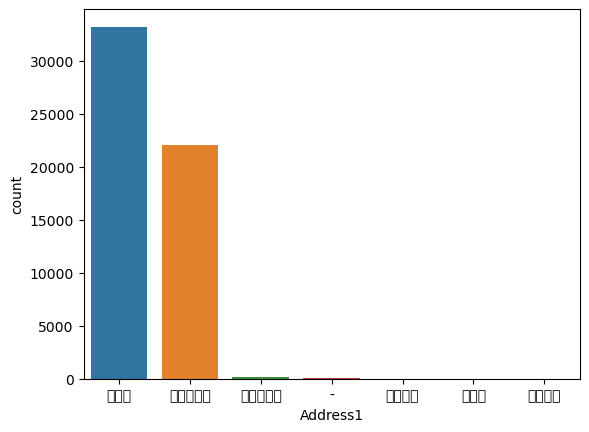

In [27]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns
sns.countplot(x='Address1', data = df)
df = df.loc[df['Address1']!='-', :]

<br>

### 5. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다.
### Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.
* Seaborn을 활용하세요.
* X축에는 Time_Driving(실주행시간)을 표시하고 Y축에는 Speed_Per_Hour(평균시속)을 표시하세요.

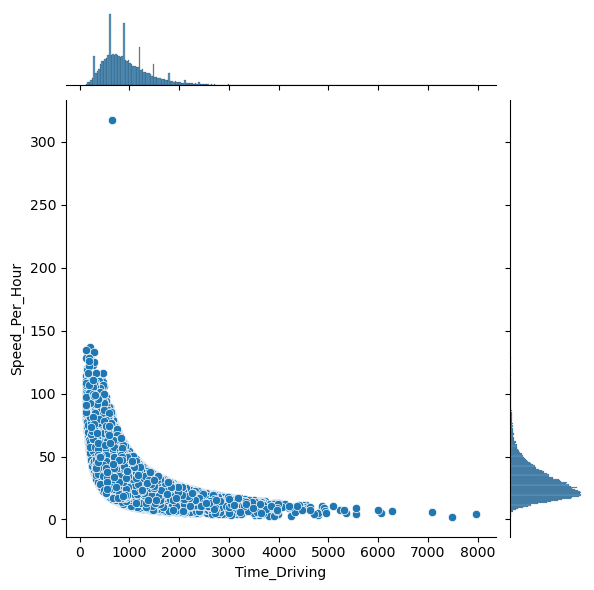

In [28]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

<br>

### 6. 위의 jointplot 그래프에서 시속 300이 넘는 이상치를 발견할 수 있습니다.
### jointplot 그래프에서 발견한 이상치 1개를 삭제하세요.
* 대상 데이터프레임: df
* jointplot 그래프를 보고 시속 300 이상되는 이상치를 찾아 해당 행(Row)을 삭제하세요.
* 전처리 반영 후에 새로운 데이터프레임 변수명 df_temp에 저장하세요.

In [29]:
# 여기에 답안코드를 작성하세요.
df.loc[df['Speed_Per_Hour']>=300, :]
df_temp = df.drop(8, axis=0)

<br>

### 7. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
### 아래 가이드를 따라 결측치 처리하세요.
* 대상 데이터프레임: df_temp
* 결측치를 확인하는 코드를 작성하세요.
* 결측치가 있는 행(raw)를 삭제 하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_na에 저장하세요.

In [31]:
# 여기에 답안코드를 작성하세요.
df_temp.isna().sum()
df_na = df_temp.dropna()

<br>

### 8. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
### 아래 가이드를 따라 불필요 데이터를 삭제 처리하세요.
* 대상 데이터프레임: df_na
* 'Time_Departure', 'Time_Arrival' 2개 컬럼을 삭제하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.

In [33]:
# 여기에 답안코드를 작성하세요.
df_del = df_na.drop(columns=['Time_Departure', 'Time_Arrival'], axis=1)

<br>

### 9. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.
### 원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
* 대상 데이터프레임: df_del
* 원-핫 인코딩 대상: object 타입의 전체 컬럼
* 활용 함수: pandas의 get_dummies
* 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [37]:
# 여기에 답안코드를 작성하세요.
df_preset = pd.get_dummies(df_del, drop_first=True)

<br>

### 10. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
### Time_Driving(실주행시간) 컬럼을 label값 y로, 나머지 컬럼을 feature값 X로 할당한 후 훈련데이터셋과 검증데이터셋으로 분리하세요.
* 대상 데이터프레임: df_preset
* 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
* 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
* 훈련 데이터셋과 검증데이터셋 비율은 80:20
* random_state: 42
* Scikit-learn의 train_test_split 함수를 활용하세요.

In [38]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

target = 'Time_Driving'
X = df_preset.drop(target, axis=1)
y = df_preset.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((44344, 87), (11087, 87), (44344,), (11087,))

<br>

### 11. Time_Driving(실주행시간)을 예측하는 머신러닝 모델을 만들려고 합니다.
### 의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 모형으로
### 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있습니다.
### 의사결정나무(decision tree)로 학습을 진행하세요.
* 트리의 최대 깊이: 5로 설정
* 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split): 3로 설정
* random_state: 120로 설정

In [44]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 5,
                               min_samples_split = 3,
                               random_state = 120)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

<br>

### 12. 위 의사결정나무(decision tree) 모델의 성능을 평가하려고 합니다.
### 예측 결과의 mae(Mean Absolute Error)를 구하세요.
* 성능 평가는 검증 데이터셋을 활용하세요.
* 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.
* 검증 정답(y_valid)과 예측값(y_pred)의 mae(Mean Absolute Error)를 구하고 dt_mae 변수에 저장하세요.

In [61]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, y_pred)

In [62]:
dt_mae

113.87838566407876

<br>

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

<br>

### 13. Time_Driving(실주행시간)을 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [77]:
# 여기에 답안코드를 작성하세요.
model = Sequential([Dense(16, activation='relu', input_shape=X_train.iloc[0,:].shape),
                    Dropout(0.2),
                    Dense(8, activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1)])
model.compile(loss='mse', optimizer='adam')

es = EarlyStopping(monitor='val_loss',
                  patience=10,
                  min_delta=0,)
mc = ModelCheckpoint(filepath='model.checkpoint.keras', monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid), callbacks=[es, mc])

Epoch 1/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 302769.8750 - val_loss: 140700.4844
Epoch 2/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 130479.8047 - val_loss: 92115.5078
Epoch 3/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 91907.2109 - val_loss: 58916.5586
Epoch 4/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 67254.8984 - val_loss: 49402.6953
Epoch 5/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 53774.1562 - val_loss: 45060.9492
Epoch 6/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 42231.1289 - val_loss: 52954.0078
Epoch 7/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 34529.9727 - val_loss: 50613.9336
Epoch 8/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 30422.0215 - val_loss: 46208.5352
Epoch 9/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 29631.8613 - val_loss: 36598.7188
Epoch 10/30
2772/2772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 25648.0020 - val_loss: 58250.8242
Epoch 11/30
2772/2772 ━━━━━━━━━━━━━━

<br>

### 14. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
* 그래프의 타이틀은 'Model MSE'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

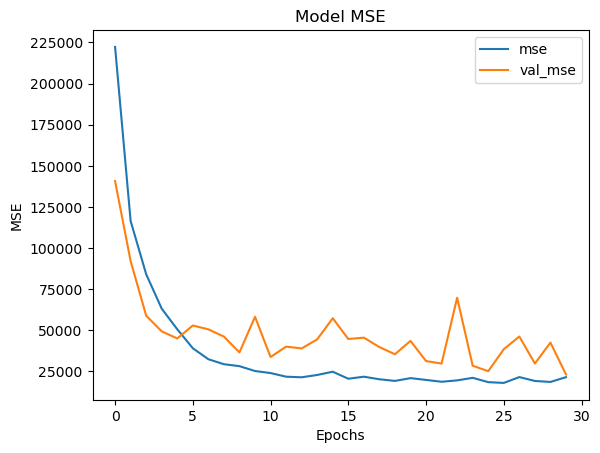

In [82]:
# 여기에 답안코드를 작성하세요.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['mse', 'val_mse'])
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()